# Project: Investigate a Dataset - Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The data is about the results of soccer matches in european countries from 2008 to 2016. For each country, there is a football league in wich more teams play matches. There are 7 tables connected to deal with: 

<ol>
    <li>Country: 
        <ul>
            <li>ID</li>
            <li>Name</li>
        </ul>
    </li>
    <li>League: 
        <ul>
            <li>ID</li>
            <li>ID of the league's country</li>
            <li>Name</li>
        </ul>
    </li>
    <li>Player: 
        <ul>
            <li>ID</li>
            <li>ID of the player's country</li>
            <li>Name</li>
            <li>Birthday</li>
            <li>Height</li>
            <li>Weight</li>
        </ul>
    </li>
    <li>Player_Attributes: 
        <ul>
            <li>ID</li>
            <li>Date of the evaluation</li>
            <li>Statistics about the skills that player have</li>
        </ul>
    </li>
    <li>Team: 
        <ul>
            <li>ID</li>
            <li>Name</li>
        </ul>
    </li>
    <li>Team_Attributes: 
        <ul>
            <li>ID</li>
            <li>Date of the evaluation</li>
            <li>Statistics about the way the team play</li>
        </ul>
    </li>
    <li>Match: 
        <ul>
            <li>ID</li>
            <li>ID of the match's league</li>
            <li>ID of the match's country</li>
            <li>Season</li>
            <li>Stage</li>
            <li>Date of the match</li>
            <li>ID of the home and away team</li>
            <li>Number of the home and away goal</li>
            <li>Players line up of home and away team</li>
            <li>Details about the match(number of: goal, shoton, shotoff, foul commit, card, corner)</li>
            <li>Possesion</li>
            <li>Betting odds (win, draw and lose)</li>
        </ul>
    </li>
    
</ol>  

### Question(s) for Analysis


While exploring the data, we will answer to these questions:

<ol>
    <li>
        What teams win the most title over the year?
    </li>
    <li>
        What teams have the best attack/defence over the year?
    </li>
    <li>
        What is the most competitive league in Europe?
    </li>
    <li>
        What teams improved the most over the time period?
    </li>
</ol>
 

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [1]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_player = pd.read_csv("./Database_Soccer/Player.csv")
df_player_attr = pd.read_csv("./Database_Soccer/Player_Attributes.csv")
df_team = pd.read_csv("./Database_Soccer/Team.csv")
df_team_attr = pd.read_csv("./Database_Soccer/Team_Attributes.csv")
df_match = pd.read_csv("./Database_Soccer/Match.csv")
df_country = pd.read_csv("./Database_Soccer/Country.csv")
df_league = pd.read_csv("./Database_Soccer/League.csv")

Let's take a look at the dataframe one by one:

In [3]:
# Use a function to assess data
def assessing_data(data):
    print(data.info(),"\n")
    print("Number of duplicated: ", data.duplicated().sum(),"\n")
    print("Number of unique non null value :\n", data.nunique(), "\n")   

In [4]:
df_country.head(5)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [5]:
df_league.head(5)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


We need to combine league and country to indicate league of each country in the same dataframe

In [6]:
# We merge the dataframes indentified by their id
df_league_country = df_league.merge(df_country, how="inner", on="id", suffixes=('_league', '_country'))
assessing_data(df_league_country)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 4 columns):
id              11 non-null int64
country_id      11 non-null int64
name_league     11 non-null object
name_country    11 non-null object
dtypes: int64(2), object(2)
memory usage: 440.0+ bytes
None 

Number of duplicated:  0 

Number of unique non null value :
 id              11
country_id      11
name_league     11
name_country    11
dtype: int64 



In [7]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [8]:
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


The only columns we need in the player dataframe is the name and player_api_id. We need the player_api_id in order to identify the name of the player .let's create a new column in player attrbutes dataframe for the player name and we use this dataframe for the next  

In [9]:
# We use merge to create the new column player_name
df_player_attr = df_player_attr.merge(df_player[["player_api_id","player_name"]], how='inner', on='player_api_id')
df_player_attr.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,Aaron Cresswell


In [10]:
assessing_data(df_player_attr)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 43 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [11]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [12]:
df_team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Like the player dataframe, we only need team_long_name from the team dataframe. Let's create a new column in team attribute dataframe indentified by the team_api_id and we will use the dataframe for the next.

In [13]:
# We use merge to create the new column team_long_name
df_team_attr = df_team_attr.merge(df_team[["team_api_id","team_long_name"]], how='inner', on='team_api_id').rename(columns={"team_long_name":"team_name"})
df_team_attr.head(10)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen
5,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,...,Normal,Organised,40,Medium,40,Press,60,Normal,Cover,Aberdeen
6,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,...,Normal,Organised,42,Medium,42,Press,60,Normal,Cover,Aberdeen
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,...,Normal,Organised,41,Medium,42,Press,60,Normal,Cover,Aberdeen
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,...,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover,Aberdeen
9,10,614,8576,2010-02-22 00:00:00,60,Balanced,NaN,Little,40,Mixed,...,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap,AC Ajaccio


In [14]:
assessing_data(df_team_attr)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 26 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [15]:
assessing_data(df_match)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None 

Number of duplicated:  0 

Number of unique non null value :
 id            25979
country_id       11
league_id        11
season            8
stage            38
              ...  
GBD              84
GBA             172
BSH             101
BSD              59
BSA              96
Length: 115, dtype: int64 



### Conclusion

There are some missing values with the features of each dataframe we need to deal with. But there is no duplicated row. After merging the dataframe, we only have 4 to perform the analysis. There are columns that we don't need (fifa_id). In addition, the names of each column are already in camel case that we don't need to rename.


### Data Cleaning

After assessing the dataframes, we have some missing values that we need to drop or fill. Let's deal with them one by one
 

#### df_league_country

In [16]:
df_league_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 4 columns):
id              11 non-null int64
country_id      11 non-null int64
name_league     11 non-null object
name_country    11 non-null object
dtypes: int64(2), object(2)
memory usage: 440.0+ bytes


The df_league_country doesn't have any missing value

#### df_player_att

In [17]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 43 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [18]:
## Let's first fill the nan values of float with mean
for col in df_player_attr.select_dtypes(include=['float']).columns:
    df_player_attr[col] = df_player_attr[col].fillna(df_player_attr[col].mean())
    
## And the object nan with the mode
for col in ["preferred_foot","defensive_work_rate"]:
    df_player_attr[col] = df_player_attr[col].fillna(df_player_attr[col].mode().values[0])

In [19]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 0 to 183977
Data columns (total 43 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183978 non-null float64
potential              183978 non-null float64
preferred_foot         183978 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183978 non-null object
crossing               183978 non-null float64
finishing              183978 non-null float64
heading_accuracy       183978 non-null float64
short_passing          183978 non-null float64
volleys                183978 non-null float64
dribbling              183978 non-null float64
curve                  183978 non-null float64
free_kick_accuracy     183978 non-null float64
long_passing           183978 non-null float64
ball_control           183978 non-null float64
accele

We use mean and mode to fill the null values because if we drop them, some players who are in the match dataframe won't be found.

### df_team_attr

In [20]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 26 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

We can see that the buildUpPlayDribbling have a lot of missing values(<35%), so it is better to drop this column and we only use the year with the date column

In [21]:
df_team_attr.drop("buildUpPlayDribbling", inplace=True, axis=1)

In [22]:
for row in range(df_team_attr.shape[0]):
    df_team_attr["date"][row] = df_team_attr['date'][row].split('-')[0]
df_team_attr

/tmp/ipykernel_45756/244999092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_attr["date"][row] = df_team_attr['date'][row].split('-')[0]


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_name
0,1,434,9930,2010,60,Balanced,Little,50,Mixed,Organised,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau
1,2,434,9930,2014,52,Balanced,Normal,56,Mixed,Organised,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
2,3,434,9930,2015,47,Balanced,Normal,54,Mixed,Organised,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau
3,4,77,8485,2010,70,Fast,Little,70,Long,Organised,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen
4,5,77,8485,2011,47,Balanced,Little,52,Mixed,Organised,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011,52,Balanced,Little,52,Mixed,Organised,...,Normal,Organised,46,Medium,48,Press,53,Normal,Cover,SV Zulte-Waregem
1454,1455,15005,10000,2012,54,Balanced,Little,51,Mixed,Organised,...,Normal,Organised,44,Medium,55,Press,53,Normal,Cover,SV Zulte-Waregem
1455,1456,15005,10000,2013,54,Balanced,Little,51,Mixed,Organised,...,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem
1456,1457,15005,10000,2014,54,Balanced,Normal,51,Mixed,Organised,...,Little,Organised,44,Medium,58,Press,37,Normal,Cover,SV Zulte-Waregem


In [23]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootingClass       1458 non-null object
chanceCreationPositio

###  df_match

In [24]:
df_match.info(max_cols=115)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
home_player_X1      24158 non-null float64
home_player_X2      24158 non-null float64
home_player_X3      24147 non-null float64
home_player_X4      24147 non-null float64
home_player_X5      24147 non-null float64
home_player_X6      24147 non-null float64
home_player_X7      24147 non-null float64
home_player_X8      24147 non-null float64
home_player_X9      24147 non-null float64
home_player_X10     24147 non-null float64
home_pl

For this dataframe,to answer to our questions, we don't really need the features about the bet odd or the players who plays during a match. So let's drop them.

In [25]:
df_match_short = df_match.dropna(axis=1)
df_match_short

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [26]:
df_match_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


### Save into csv file

In [27]:
df_league_country.to_csv("df_league_country.csv")
df_match_short.to_csv("df_match_short.csv")
df_player_attr.to_csv("df_player_attr.csv")
df_team_attr.to_csv("df_team_attr.csv")

<a id='eda'></a>
## Exploratory Data Analysis





Let's create 2 new columns away and home points in the match data to follow the rules of win, lose and draw:
* Win: 3 points
* Lose: 0 point
* Draw: 1 point

In [28]:
df_match_short["home_team_points"]=0
df_match_short["away_team_points"]=0

for row in range(df_match_short.shape[0]):
    if df_match_short["away_team_goal"][row]==df_match_short["home_team_goal"][row]:
        df_match_short["home_team_points"][row]=1
        df_match_short["away_team_points"][row]=1
    elif df_match_short["away_team_goal"][row]<df_match_short["home_team_goal"][row]:
        df_match_short["home_team_points"][row]=3
        df_match_short["away_team_points"][row]=0
    else:
        df_match_short["home_team_points"][row]=0
        df_match_short["away_team_points"][row]=3        

/tmp/ipykernel_45756/2604421404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_short["home_team_points"]=0
/tmp/ipykernel_45756/2604421404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_short["away_team_points"]=0
/tmp/ipykernel_45756/2604421404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

In [29]:
df_match_short.tail()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_points,away_team_points
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,3,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,0,3
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,3,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,1,1
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,3,3,0


Next, let's create a new dataframe team_points showing the number of points of each team for each season and the total of home/away goal scored plus the goal conceded

In [30]:
# We need the points from the home and away points for each team first then add goal scored and goal conceded 
home_points = df_match_short.groupby(["home_team_api_id","season","country_id"])["home_team_points","home_team_goal","away_team_goal"].agg(['sum', 'count']).reset_index()
home_points.columns = ['team_api_id', 'season','country_id', 'points', 'matches_number','home_goal_scored','a',"home_goal_conceded","b"]
home_points.drop(["a","b"],axis = 1,inplace = True) # We don't need two count columns

# Away points
away_points = df_match_short.groupby(["away_team_api_id","season","country_id"])["away_team_points","away_team_goal","home_team_goal"].agg(['sum', 'count']).reset_index()
away_points.columns = ['team_api_id', 'season',"country_id", 'points', 'matches_number','away_goal_scored','a',"away_goal_conceded","b"]
away_points.drop(["a","b"],axis = 1,inplace = True) # We don't need two count columns
home_points.head(10)

,team_api_id,season,country_id,points,matches_number,home_goal_scored,home_goal_conceded
0,1601,2008/2009,15722,21,15,13,11
1,1601,2009/2010,15722,32,15,22,12
2,1601,2010/2011,15722,23,15,14,12
3,1601,2011/2012,15722,30,15,24,12
4,1601,2012/2013,15722,17,15,17,21
5,1601,2013/2014,15722,26,15,18,15
6,1601,2014/2015,15722,21,15,20,14
7,1601,2015/2016,15722,20,15,20,26
8,1773,2011/2012,1,20,15,25,24
9,1773,2012/2013,1,21,15,26,27


In [31]:
away_points.head(10)

,team_api_id,season,country_id,points,matches_number,away_goal_scored,away_goal_conceded
0,1601,2008/2009,15722,13,15,9,21
1,1601,2009/2010,15722,21,15,18,18
2,1601,2010/2011,15722,15,15,15,20
3,1601,2011/2012,15722,25,15,20,16
4,1601,2012/2013,15722,14,15,18,27
5,1601,2013/2014,15722,24,15,22,23
6,1601,2014/2015,15722,12,15,13,24
7,1601,2015/2016,15722,19,15,17,20
8,1773,2011/2012,1,9,15,13,34
9,1773,2012/2013,1,15,15,20,24


In [32]:
# Check if we have the same rows
home_points.shape, away_points.shape

((1481, 7), (1481, 7))

In [33]:
# Combine the two dataframes: points, total goal scored/conceded for each home and away match per team per season
df_points = pd.concat([home_points, away_points], sort=False).groupby(['team_api_id', 'season',"country_id"]).sum().reset_index()

# Let's add a total goal scored/conceded per season
df_points["total_goal_scored"] = df_points["away_goal_scored"] + df_points["home_goal_scored"]
df_points["total_goal_conceded"] = df_points["away_goal_conceded"] + df_points["home_goal_conceded"]
df_points.head()

,team_api_id,season,country_id,points,matches_number,home_goal_scored,home_goal_conceded,away_goal_scored,away_goal_conceded,total_goal_scored,total_goal_conceded
0,1601,2008/2009,15722,34,30,13.0,11.0,9.0,21.0,22.0,32.0
1,1601,2009/2010,15722,53,30,22.0,12.0,18.0,18.0,40.0,30.0
2,1601,2010/2011,15722,38,30,14.0,12.0,15.0,20.0,29.0,32.0
3,1601,2011/2012,15722,55,30,24.0,12.0,20.0,16.0,44.0,28.0
4,1601,2012/2013,15722,31,30,17.0,21.0,18.0,27.0,35.0,48.0


We have the total points of each team per season. All we need to do right now is to add the team name for later use.

In [34]:
df_points_year = df_points.merge(df_team[["team_api_id","team_long_name"]], how="inner", on="team_api_id")
df_points_year.head(10)

,team_api_id,season,country_id,points,matches_number,home_goal_scored,home_goal_conceded,away_goal_scored,away_goal_conceded,total_goal_scored,total_goal_conceded,team_long_name
0,1601,2008/2009,15722,34,30,13.0,11.0,9.0,21.0,22.0,32.0,Ruch Chorzów
1,1601,2009/2010,15722,53,30,22.0,12.0,18.0,18.0,40.0,30.0,Ruch Chorzów
2,1601,2010/2011,15722,38,30,14.0,12.0,15.0,20.0,29.0,32.0,Ruch Chorzów
3,1601,2011/2012,15722,55,30,24.0,12.0,20.0,16.0,44.0,28.0,Ruch Chorzów
4,1601,2012/2013,15722,31,30,17.0,21.0,18.0,27.0,35.0,48.0,Ruch Chorzów
5,1601,2013/2014,15722,50,30,18.0,15.0,22.0,23.0,40.0,38.0,Ruch Chorzów
6,1601,2014/2015,15722,33,30,20.0,14.0,13.0,24.0,33.0,38.0,Ruch Chorzów
7,1601,2015/2016,15722,39,30,20.0,26.0,17.0,20.0,37.0,46.0,Ruch Chorzów
8,1773,2011/2012,1,29,30,25.0,24.0,13.0,34.0,38.0,58.0,Oud-Heverlee Leuven
9,1773,2012/2013,1,36,30,26.0,27.0,20.0,24.0,46.0,51.0,Oud-Heverlee Leuven


### What teams win the most title?

In order to answer to this question, let's use the df_points_year dataframe to show the winner of each league per year. The winner of the title is the team that have the high total points. In addition to that, let's create the column of average goal scored per match.

In [35]:
# Let's add the name of the country in our dataset
df_points_year = df_points_year.merge(df_league_country[["country_id","name_country"]], how="inner", on="country_id")

# And create the average goal scored per match column
df_points_year["goal_scored_match"] = df_points_year["points"]/df_points_year["matches_number"]
df_points_year.head()

,team_api_id,season,country_id,points,matches_number,home_goal_scored,home_goal_conceded,away_goal_scored,away_goal_conceded,total_goal_scored,total_goal_conceded,team_long_name,name_country,goal_scored_match
0,1601,2008/2009,15722,34,30,13.0,11.0,9.0,21.0,22.0,32.0,Ruch Chorzów,Poland,1.133333
1,1601,2009/2010,15722,53,30,22.0,12.0,18.0,18.0,40.0,30.0,Ruch Chorzów,Poland,1.766667
2,1601,2010/2011,15722,38,30,14.0,12.0,15.0,20.0,29.0,32.0,Ruch Chorzów,Poland,1.266667
3,1601,2011/2012,15722,55,30,24.0,12.0,20.0,16.0,44.0,28.0,Ruch Chorzów,Poland,1.833333
4,1601,2012/2013,15722,31,30,17.0,21.0,18.0,27.0,35.0,48.0,Ruch Chorzów,Poland,1.033333


Next, let's take all title winners per season per country

In [36]:
df = df_points_year.groupby(["season","name_country","team_long_name","goal_scored_match"])["points"].agg(['max']).reset_index()
df.columns = ["season","name_country","team_long_name","goal_scored_match","points"]
df_winner = pd.DataFrame(columns=df.columns)

# Now we have the result by looping for each season and each country
for season in df["season"].unique():
    for country in df["name_country"].unique():
        df_sorted = df[(df["season"]==season) & (df["name_country"]==country)].sort_values(by = 'points',ascending = False)
        df_winner = df_winner.append(df_sorted.iloc[0:1,:])
df_winner        

,season,name_country,team_long_name,goal_scored_match,points
16,2008/2009,Belgium,Standard de Liège,2.264706,77
28,2008/2009,England,Manchester United,2.368421,90
45,2008/2009,France,Girondins de Bordeaux,2.105263,80
75,2008/2009,Germany,VfL Wolfsburg,2.029412,69
83,2008/2009,Italy,Inter,2.210526,84
...,...,...,...,...,...
1411,2015/2016,Poland,Legia Warszawa,2.000000,60
1433,2015/2016,Portugal,SL Benfica,2.588235,88
1440,2015/2016,Scotland,Celtic,2.263158,86
1453,2015/2016,Spain,FC Barcelona,2.394737,91


In [37]:
df_winner.sort_values("points", ascending=False)

,season,name_country,team_long_name,goal_scored_match,points
1002,2013/2014,Italy,Juventus,2.684211,102
728,2011/2012,Spain,Real Madrid CF,2.631579,100
904,2012/2013,Spain,FC Barcelona,2.631579,100
1064,2013/2014,Scotland,Celtic,2.605263,99
347,2009/2010,Spain,FC Barcelona,2.605263,99
...,...,...,...,...,...
1411,2015/2016,Poland,Legia Warszawa,2.000000,60
1224,2014/2015,Poland,Legia Warszawa,1.866667,56
498,2010/2011,Poland,Wisła Kraków,1.866667,56
686,2011/2012,Poland,Śląsk Wrocław,1.866667,56


In [38]:
# Count of the titles won by a team
df_champions = df_winner.groupby(["team_long_name",])["season"].agg(['count']).reset_index().sort_values("count",ascending=False)
df_champions.head(5)

,team_long_name,count
8,FC Basel,7
7,FC Barcelona,6
15,Juventus,5
4,Celtic,5
9,FC Bayern Munich,5


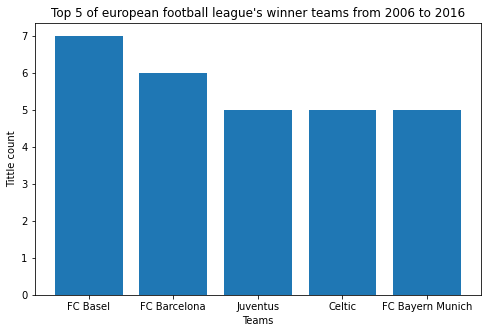

In [39]:
# Let's take a look at the winner of title per league per season with matplotlib:

plt.subplots(figsize=(8, 5))
locations = [1,2,3,4,5]
heights = df_champions["count"].values[0:5]
labels = df_champions["team_long_name"].values[0:5]
plt.bar(locations, heights, tick_label=labels)
plt.title("Top 5 of european football league's winner teams from 2006 to 2016")
plt.xlabel("Teams")
plt.ylabel("Tittle count");

### What teams have the best attack/defence in each country over the year?

We evaluate the attack and the defence of a team by the number of goal scored and conceded.

In [40]:
# Let's use the df_points_year in this case
# The best attack/defence is the team that have the highest goal scored/ lowest goal conceded 
# so let's add 2 columns in df_points_year
df_points_year["average_goal_scored"] = df_points_year["total_goal_scored"]/df_points_year["matches_number"]
df_points_year["average_goal_conceded"] = df_points_year["total_goal_conceded"]/df_points_year["matches_number"]

# Best attack
cols_attack = ["season","name_country","team_long_name","average_goal_scored"] # We only need these columns
df_attack_score = pd.DataFrame(columns = cols_attack)
df_attack = df_points_year[cols_attack]

for season in df["season"].unique():
    for country in df["name_country"].unique():
        df_sorted = df_attack[(df_attack["season"]==season) & (df_attack["name_country"]==country)].sort_values(by = 'average_goal_scored',ascending = False)
        df_attack_score = df_attack_score.append(df_sorted.iloc[0:1,:])

# Best defence
cols_defence = ["season","name_country","team_long_name","average_goal_conceded"] # We only need these columns
df_defence_score = pd.DataFrame(columns = cols_defence)
df_defence = df_points_year[cols_defence]

for season in df_defence["season"].unique():
    for country in df_defence["name_country"].unique():
        df_sorted = df_defence[(df_defence["season"]==season) & (df_defence["name_country"]==country)].sort_values(by = 'average_goal_conceded',ascending = True)
        df_defence_score = df_defence_score.append(df_sorted.iloc[0:1,:])
        
        
df_attack_score.head()


,season,name_country,team_long_name,average_goal_scored
162,2008/2009,Belgium,RSC Anderlecht,2.205882
1378,2008/2009,England,Liverpool,2.026316
412,2008/2009,France,Olympique de Marseille,1.763158
1233,2008/2009,Germany,VfL Wolfsburg,2.352941
616,2008/2009,Italy,Inter,1.842105


In [41]:
df_defence_score.head()

,season,name_country,team_long_name,average_goal_conceded
111,2008/2009,Poland,Legia Warszawa,0.566667
175,2008/2009,Belgium,Standard de Liège,0.764706
313,2008/2009,Portugal,FC Porto,0.600000
519,2008/2009,France,Toulouse FC,0.710526
616,2008/2009,Italy,Inter,0.842105


In [42]:
# Let's have the result in a 2D arrays containing the best attack and defence for each year 

# Best attack
df_best_attack = pd.DataFrame(index=df_attack_score["season"].unique(),columns = df_attack_score["name_country"].unique())
for season in df_attack_score["season"].unique():
    for country in df_best_attack.columns:
        df_best_attack.loc[season][country] = df_attack_score[(df_attack_score["season"]==season) & (df_attack_score["name_country"]==country)]["team_long_name"].values[0]
df_best_attack.T        

,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
Belgium,RSC Anderlecht,RSC Anderlecht,KRC Genk,KAA Gent,RSC Anderlecht,KAA Gent,Club Brugge KV,Club Brugge KV
England,Liverpool,Chelsea,Manchester United,Manchester City,Manchester United,Manchester City,Manchester City,Manchester City
France,Olympique de Marseille,LOSC Lille,LOSC Lille,Paris Saint-Germain,Paris Saint-Germain,Paris Saint-Germain,Paris Saint-Germain,Paris Saint-Germain
Germany,VfL Wolfsburg,FC Bayern Munich,FC Bayern Munich,Borussia Dortmund,FC Bayern Munich,FC Bayern Munich,FC Bayern Munich,Borussia Dortmund
Italy,Inter,Inter,Inter,Milan,Napoli,Juventus,Juventus,Roma
Netherlands,Ajax,Ajax,PSV,Ajax,PSV,Feyenoord,PSV,PSV
Poland,Wisła Kraków,Lech Poznań,Śląsk Wrocław,Śląsk Wrocław,Legia Warszawa,Legia Warszawa,Legia Warszawa,Legia Warszawa
Portugal,FC Porto,SL Benfica,FC Porto,FC Porto,SL Benfica,SL Benfica,SL Benfica,SL Benfica
Scotland,Celtic,Rangers,Rangers,Celtic,Celtic,Celtic,Celtic,Celtic
Spain,FC Barcelona,Real Madrid CF,Real Madrid CF,Real Madrid CF,FC Barcelona,Real Madrid CF,Real Madrid CF,FC Barcelona


In [43]:
# Best defence
df_best_defence = pd.DataFrame(index=df_attack_score["season"].unique(),columns = df_attack_score["name_country"].unique())
for season in df_defence_score["season"].unique():
    for country in df_best_attack.columns:
        df_best_defence.loc[season][country] = df_defence_score[(df_defence_score["season"]==season) & (df_defence_score["name_country"]==country)]["team_long_name"].values[0]
df_best_defence.T  

,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
Belgium,Standard de Liège,RSC Anderlecht,RSC Anderlecht,RSC Anderlecht,RSC Anderlecht,KV Oostende,Club Brugge KV,RSC Anderlecht
England,Chelsea,Manchester United,Chelsea,Manchester City,Manchester City,Chelsea,Chelsea,Tottenham Hotspur
France,Toulouse FC,AJ Auxerre,Stade Rennais FC,Montpellier Hérault SC,Paris Saint-Germain,Paris Saint-Germain,AS Monaco,Paris Saint-Germain
Germany,FC Schalke 04,FC Bayern Munich,Borussia Dortmund,FC Bayern Munich,FC Bayern Munich,FC Bayern Munich,FC Bayern Munich,FC Bayern Munich
Italy,Inter,Inter,Milan,Juventus,Juventus,Juventus,Juventus,Juventus
Netherlands,AZ,Ajax,Ajax,AZ,Ajax,Ajax,Ajax,Ajax
Poland,Legia Warszawa,Lech Poznań,Lech Poznań,Legia Warszawa,Lech Poznań,Legia Warszawa,Lech Poznań,Legia Warszawa
Portugal,FC Porto,SL Benfica,FC Porto,FC Porto,FC Porto,SL Benfica,FC Porto,Sporting CP
Scotland,Rangers,Rangers,Celtic,Celtic,Celtic,Celtic,Celtic,Celtic
Spain,FC Barcelona,FC Barcelona,FC Barcelona,FC Barcelona,Atlético Madrid,Atlético Madrid,FC Barcelona,Atlético Madrid


### What is the most competitive league in Europe?

In order to answer to this question, let's evaluate the point differential from the last and the first

As we see in the frist question, we already have a dataframe for the first team in each country. Let's create the last team dataframe using the same method as before.

In [44]:
df = df_points_year.groupby(["season","name_country","team_long_name","goal_scored_match"])["points"].agg(['min']).reset_index()
df.columns = ["season","name_country","team_long_name","goal_scored_match","points"]
df_last = pd.DataFrame(columns=df.columns)

# Now we have the result by looping for each season and each country
for season in df["season"].unique():
    for country in df["name_country"].unique():
        df_sorted = df[(df["season"]==season) & (df["name_country"]==country)].sort_values(by = 'points',ascending = True)
        df_last = df_last.append(df_sorted.iloc[0:1,:])
df_winner 

,season,name_country,team_long_name,goal_scored_match,points
16,2008/2009,Belgium,Standard de Liège,2.264706,77
28,2008/2009,England,Manchester United,2.368421,90
45,2008/2009,France,Girondins de Bordeaux,2.105263,80
75,2008/2009,Germany,VfL Wolfsburg,2.029412,69
83,2008/2009,Italy,Inter,2.210526,84
...,...,...,...,...,...
1411,2015/2016,Poland,Legia Warszawa,2.000000,60
1433,2015/2016,Portugal,SL Benfica,2.588235,88
1440,2015/2016,Scotland,Celtic,2.263158,86
1453,2015/2016,Spain,FC Barcelona,2.394737,91


Now, we have the point differential from the last and the first:

In [45]:
# Let's have the result in a dataframe with new column point_differential
# We join the last and frist dataframe:
df_point_differential = df_winner[["season","name_country","points"]].merge(df_last[["season","name_country","points"]],
                                                                            how="inner",on=["season","name_country"],
                                                                            suffixes=["_first","_last"])

# Difference
df_point_differential["point_differential"] = df_point_differential["points_first"]-df_point_differential["points_last"]
# Let's use float instead of object
df_point_differential.point_differential = df_point_differential.point_differential.astype(float)
df_point_differential

,season,name_country,points_first,points_last,point_differential
0,2008/2009,Belgium,77,19,58.0
1,2008/2009,England,90,32,58.0
2,2008/2009,France,80,26,54.0
3,2008/2009,Germany,69,28,41.0
4,2008/2009,Italy,84,30,54.0
...,...,...,...,...,...
83,2015/2016,Poland,60,26,34.0
84,2015/2016,Portugal,88,25,63.0
85,2015/2016,Scotland,86,31,55.0
86,2015/2016,Spain,91,32,59.0


In [46]:
# Group the data by country name and point differential mean
df_average_point_differential = df_point_differential.groupby(["name_country"],as_index=False)["point_differential"].agg("mean")
df_average_point_differential.sort_values(by="point_differential",)

,name_country,point_differential
6,Poland,34.250
0,Belgium,42.500
10,Switzerland,49.375
3,Germany,54.625
7,Portugal,56.250
2,France,58.125
5,Netherlands,58.250
1,England,58.500
8,Scotland,58.750
4,Italy,61.500


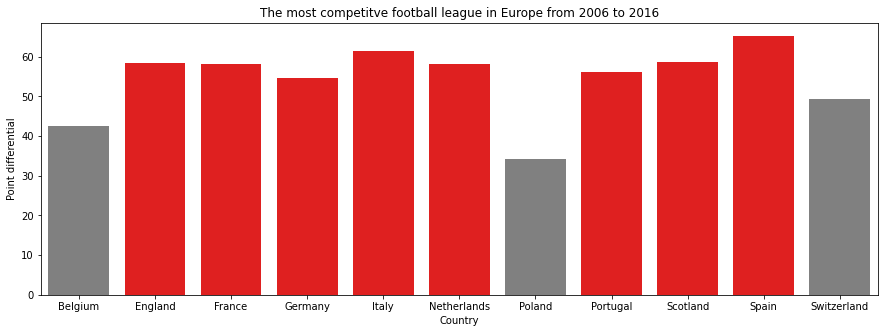

In [47]:
# Let's plot the result with seaborn
colors = ['grey' if(x<50) else "red" for x in df_average_point_differential["point_differential"]]
plt.subplots(figsize=(15, 5))
sns.barplot(x=df_average_point_differential["name_country"],y=df_average_point_differential["point_differential"],palette=colors)
plt.title('The most competitve football league in Europe from 2006 to 2016')
plt.xlabel('Country')
plt.ylabel('Point differential');

### What teams improved the most over the time period?

In order to answer to this question, let's use the dataframe team_attr and use the float and int attributes 

In [48]:
# We use only numerical attributes
pd.set_option('display.max_columns', None)
num_cols = ["buildUpPlaySpeed","buildUpPlayPassing","chanceCreationPassing","chanceCreationCrossing"
            ,"chanceCreationShooting","defencePressure","defenceAggression","defenceTeamWidth"]
df_team_num_attr = df_team_attr.groupby(["team_name","date"],as_index=False)[num_cols].sum()
df_team_num_attr

,team_name,date,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,1. FC Kaiserslautern,2010,45,55,45,70,70,70,70,70
1,1. FC Kaiserslautern,2011,48,42,49,68,53,38,48,53
2,1. FC Kaiserslautern,2012,38,54,43,49,64,37,51,53
3,1. FC Kaiserslautern,2013,61,54,43,62,56,48,50,53
4,1. FC Kaiserslautern,2014,66,53,54,69,51,47,47,49
...,...,...,...,...,...,...,...,...,...,...
1445,Śląsk Wrocław,2011,47,55,45,48,54,48,47,51
1446,Śląsk Wrocław,2012,65,63,67,31,67,24,24,39
1447,Śląsk Wrocław,2013,65,50,67,31,67,30,30,40
1448,Śląsk Wrocław,2014,47,34,38,36,68,37,37,39


In [49]:
# Create a new column avg_notes which is the mean of attributes over the year
df_team_num_attr["avg_notes"] = 0.0

for row in range(df_team_num_attr.shape[0]):
    notes = 0
    for col in num_cols:
        notes = notes + df_team_num_attr[col][row]
    df_team_num_attr["avg_notes"][row] = notes/8
df_team_num_attr    

/tmp/ipykernel_45756/2846956393.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_num_attr["avg_notes"][row] = notes/8


,team_name,date,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,avg_notes
0,1. FC Kaiserslautern,2010,45,55,45,70,70,70,70,70,61.875
1,1. FC Kaiserslautern,2011,48,42,49,68,53,38,48,53,49.875
2,1. FC Kaiserslautern,2012,38,54,43,49,64,37,51,53,48.625
3,1. FC Kaiserslautern,2013,61,54,43,62,56,48,50,53,53.375
4,1. FC Kaiserslautern,2014,66,53,54,69,51,47,47,49,54.500
...,...,...,...,...,...,...,...,...,...,...,...
1445,Śląsk Wrocław,2011,47,55,45,48,54,48,47,51,49.375
1446,Śląsk Wrocław,2012,65,63,67,31,67,24,24,39,47.500
1447,Śląsk Wrocław,2013,65,50,67,31,67,30,30,40,47.500
1448,Śląsk Wrocław,2014,47,34,38,36,68,37,37,39,42.000


Now let's calculate the difference of avg_notes of 2015 and 2010:
* if the result is negative, the team didn't improve so let's drop it
* if the result is positive, let's give the one that improved the most

In [50]:
# Since we evaluate from 2010 to 2015, let's use a mask to take the apropiate date
df_team_attr_years = df_team_num_attr[(df_team_num_attr["date"]=="2010")  | (df_team_num_attr["date"]=="2015") ]

In [51]:
''' 
Let's group the data by the team_name and drop those who don't have values on 2010 because we evaluate from
2010 to 2015
''' 
df = df_team_attr_years[["team_name","date","avg_notes"]].groupby(["team_name"]).filter(lambda x: len(x)>1)
df = pd.DataFrame(df)
df

,team_name,date,avg_notes
0,1. FC Kaiserslautern,2010,61.875
5,1. FC Kaiserslautern,2015,51.625
6,1. FC Köln,2010,56.875
11,1. FC Köln,2015,54.625
12,1. FC Nürnberg,2010,53.125
...,...,...,...
1421,Wisła Kraków,2015,41.000
1422,Wolverhampton Wanderers,2010,70.000
1427,Wolverhampton Wanderers,2015,50.000
1444,Śląsk Wrocław,2010,50.625


In [52]:
# Next, we caclulate the difference and add it to a new dataframe
evolution_notes = []

for team in df["team_name"].unique():
    mask_2010 = (df["team_name"]==team)&(df["date"]=="2010")
    mask_2015 = (df["team_name"]==team)&(df["date"]=="2015")
    evolution_notes.append(df[mask_2015]['avg_notes'].values[0] - df[mask_2010]['avg_notes'].values[0])
df_evolution_notes = pd.DataFrame(columns = ["team_name","notes"])
df_evolution_notes["team_name"] = df["team_name"].unique()
df_evolution_notes["notes"] = evolution_notes

In [53]:
df_evolution_notes

,team_name,notes
0,1. FC Kaiserslautern,-10.25
1,1. FC Köln,-2.25
2,1. FC Nürnberg,-6.75
3,1. FSV Mainz 05,-3.75
4,AC Ajaccio,2.75
...,...,...
201,Wigan Athletic,-7.25
202,Willem II,14.00
203,Wisła Kraków,-14.00
204,Wolverhampton Wanderers,-20.00


We only use those who have positive note so let's drop the others

In [54]:
df_evolution_notes = df_evolution_notes[df_evolution_notes["notes"]>0].sort_values(by="notes", ascending=False)
df_evolution_notes

,team_name,notes
55,Empoli,22.875
69,FC Porto,20.125
162,SL Benfica,19.750
167,Sassuolo,19.250
91,Heracles Almelo,18.375
...,...,...
72,FC Sochaux-Montbéliard,0.375
60,FC Barcelona,0.250
105,Korona Kielce,0.250
155,Roma,0.250


Let's see the evolution of the top 3 team:

In [55]:
cols = ["Empoli","FC Porto","SL Benfica"]
evolution = pd.DataFrame(index=[2010,2011,2012,2013,2014,2015],columns=cols)
for col in cols:
    evolution[col] = df_team_num_attr[df_team_num_attr["team_name"]==col]["avg_notes"].values
evolution

,Empoli,FC Porto,SL Benfica
2010,33.125,41.250,40.000
2011,47.125,55.375,55.250
2012,47.500,58.875,56.375
2013,52.750,59.500,59.125
2014,56.250,59.125,59.875
2015,56.000,61.375,59.750


<Figure size 432x288 with 0 Axes>

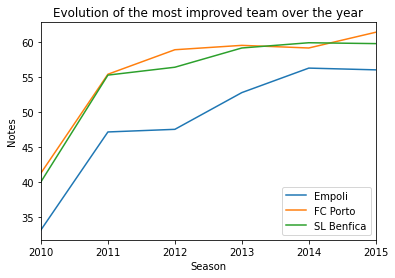

In [56]:
# Let's plot the result
plt.figure()
evolution.plot()
plt.title('Evolution of the most improved team over the year')
plt.xlabel('Season')
plt.ylabel('Notes');

<a id='conclusions'></a>
## Conclusions

In conculsion, let's summarize what we have done. 
    In order to answer to the main questions, the data needed to be cleaned. The data present more missing values that we have filled with mode and mean, but one column must be droped regard to the high number of missing values. Furthermore, we have created some columns to make our data follow the football league rules to make an efficent analysis of the questions.

We have finally the answers of our questions:

### What teams win the most title over the year?

We counted the highest number of points for each season per league and we have the dataframe of the champions:

In [57]:
df_champions.head(5)

,team_long_name,count
8,FC Basel,7
7,FC Barcelona,6
15,Juventus,5
4,Celtic,5
9,FC Bayern Munich,5


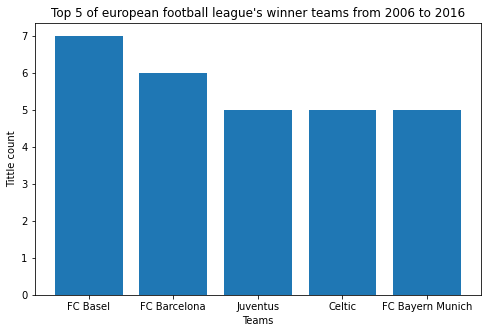

In [58]:
plt.subplots(figsize=(8, 5))
locations = [1,2,3,4,5]
heights = df_champions["count"].values[0:5]
labels = df_champions["team_long_name"].values[0:5]
plt.bar(locations, heights, tick_label=labels)
plt.title("Top 5 of european football league's winner teams from 2006 to 2016")
plt.xlabel("Teams")
plt.ylabel("Tittle count");

As we can see, Fc Basel won 7 titles from 2006 to 2016, followed by Fc Barcelona 6.
If we have the international matches between those teams, we can have the best team in Europe.

### What teams have the best attack/defence over the year?

We calculated the number of goal scored and goal conceded to have the best attack and defence in Europe: 
* The highest goal scored: the best attack
* The lowest goal conceded: the best defence
We have the dataframes:


#### Best attack


In [59]:
df_best_attack.T

,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
Belgium,RSC Anderlecht,RSC Anderlecht,KRC Genk,KAA Gent,RSC Anderlecht,KAA Gent,Club Brugge KV,Club Brugge KV
England,Liverpool,Chelsea,Manchester United,Manchester City,Manchester United,Manchester City,Manchester City,Manchester City
France,Olympique de Marseille,LOSC Lille,LOSC Lille,Paris Saint-Germain,Paris Saint-Germain,Paris Saint-Germain,Paris Saint-Germain,Paris Saint-Germain
Germany,VfL Wolfsburg,FC Bayern Munich,FC Bayern Munich,Borussia Dortmund,FC Bayern Munich,FC Bayern Munich,FC Bayern Munich,Borussia Dortmund
Italy,Inter,Inter,Inter,Milan,Napoli,Juventus,Juventus,Roma
Netherlands,Ajax,Ajax,PSV,Ajax,PSV,Feyenoord,PSV,PSV
Poland,Wisła Kraków,Lech Poznań,Śląsk Wrocław,Śląsk Wrocław,Legia Warszawa,Legia Warszawa,Legia Warszawa,Legia Warszawa
Portugal,FC Porto,SL Benfica,FC Porto,FC Porto,SL Benfica,SL Benfica,SL Benfica,SL Benfica
Scotland,Celtic,Rangers,Rangers,Celtic,Celtic,Celtic,Celtic,Celtic
Spain,FC Barcelona,Real Madrid CF,Real Madrid CF,Real Madrid CF,FC Barcelona,Real Madrid CF,Real Madrid CF,FC Barcelona


#### Best defence

In [60]:
df_best_defence.T

,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016
Belgium,Standard de Liège,RSC Anderlecht,RSC Anderlecht,RSC Anderlecht,RSC Anderlecht,KV Oostende,Club Brugge KV,RSC Anderlecht
England,Chelsea,Manchester United,Chelsea,Manchester City,Manchester City,Chelsea,Chelsea,Tottenham Hotspur
France,Toulouse FC,AJ Auxerre,Stade Rennais FC,Montpellier Hérault SC,Paris Saint-Germain,Paris Saint-Germain,AS Monaco,Paris Saint-Germain
Germany,FC Schalke 04,FC Bayern Munich,Borussia Dortmund,FC Bayern Munich,FC Bayern Munich,FC Bayern Munich,FC Bayern Munich,FC Bayern Munich
Italy,Inter,Inter,Milan,Juventus,Juventus,Juventus,Juventus,Juventus
Netherlands,AZ,Ajax,Ajax,AZ,Ajax,Ajax,Ajax,Ajax
Poland,Legia Warszawa,Lech Poznań,Lech Poznań,Legia Warszawa,Lech Poznań,Legia Warszawa,Lech Poznań,Legia Warszawa
Portugal,FC Porto,SL Benfica,FC Porto,FC Porto,FC Porto,SL Benfica,FC Porto,Sporting CP
Scotland,Rangers,Rangers,Celtic,Celtic,Celtic,Celtic,Celtic,Celtic
Spain,FC Barcelona,FC Barcelona,FC Barcelona,FC Barcelona,Atlético Madrid,Atlético Madrid,FC Barcelona,Atlético Madrid


### What is the most competitve league in Europe?

We use the point differential of the first and the last to evaluate which of the leagues is the most competitive. We have the following resut:

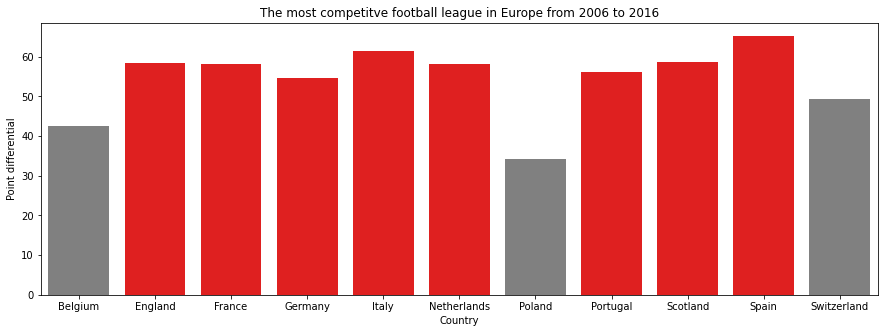

In [61]:
colors = ['grey' if(x<50) else "red" for x in df_average_point_differential["point_differential"]]
plt.subplots(figsize=(15, 5))
sns.barplot(x=df_average_point_differential["name_country"],y=df_average_point_differential["point_differential"],palette=colors)
plt.title('The most competitve football league in Europe from 2006 to 2016')
plt.xlabel('Country')
plt.ylabel('Point differential');

As we can see, Poland, Switzerland and Belgium's league are the most competitive from 2006 to 2016 because they have a low point differential from the first and the last

### What teams improved the most over the time period?

    We use the year over year method to find the team that improved the most from 2010 to 2015. We calculated the difference of the attributes mean between these years and we have the following result:

<Figure size 432x288 with 0 Axes>

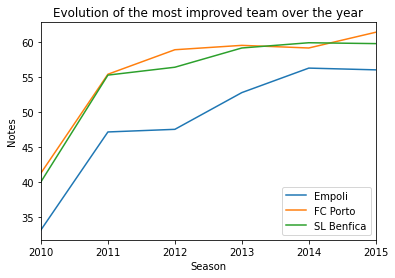

In [62]:
plt.figure()
evolution.plot()
plt.title('Evolution of the most improved team over the year')
plt.xlabel('Season')
plt.ylabel('Notes');

Empoli, Fc Porto and SL Benfica are the team that improved the most from 2010 to 2015

1- The team that won the most title in Europe are: Fc Basel and Fc Barcelona
2- The best attack and defence in each league are shown in the tables before but club in Europe should be aware of Manchester city, Real Madrid FC, Fc Barcelona regarding to the attack and defence
3- The most competitive league in Europe are Poland, Switzerland and Belgium 
4- The teams that improved the most between 2010 and 2015 are Empoli, Fc Porto and SL Benfica

Limitations: After analyzing the data, we see that the nan values of buildUpPlayDribbling of the team dataset could influence the score evolution of some players. Furthermore, we can't really use the players of each team in a match because there are some missing values in the id of players of some matches.